# Simulate balloon angioplasty of a coronary artery 

In [1]:
import pymecht as pmt
from matplotlib import pyplot as plt
import numpy as np

In [2]:
artery_mat = pmt.MatModel('nh')
balloon_mat = pmt.MatModel('nh')
artery = pmt.TubeInflation(artery_mat,force_measure='pressure')
balloon = pmt.TubeInflation(balloon_mat,force_measure='pressure')
print(artery,balloon)
artery_params = artery.parameters
balloon_params = balloon.parameters
artery_params.set('Ri',1.5)
artery_params.set('thick',1)
balloon_params.set('Ri',0.58)
balloon_params.set('thick',0.1)
artery_params.set('mu_0',0.227)
balloon_params.set('mu_0',1.72)
print(artery_params,balloon_params)

An object of type TubeInflationwith radius as input, pressure as output, and the following material
Material model with 1 component:
Component1: NH
 An object of type TubeInflationwith radius as input, pressure as output, and the following material
Material model with 1 component:
Component1: NH

------------------------------------------------------------------
Keys              Value       Fixed?      Lower bound Upper bound 
------------------------------------------------------------------
Ri                1.50        No          0.50        1.50        
thick             1.00        No          0.00        1.00        
omega             0.00        No          0.00        0.00        
L0                1.00        No          1.00        1.00        
lambdaZ           1.00        No          1.00        1.00        
mu_0              0.23        No          1.00e-04    1.00e+02    
------------------------------------------------------------------
 -------------------------------

In [3]:
combined = pmt.LayeredTube(balloon,artery)
combined_params = combined.parameters
print(combined,combined_params)

An object of type LayeredTubewith 2 layers:
Layer1: An object of type TubeInflationwith radius as input, pressure as output, and the following material
Material model with 1 component:
Component1: NH
Layer2: An object of type TubeInflationwith radius as input, pressure as output, and the following material
Material model with 1 component:
Component1: NH
 ------------------------------------------------------------------
Keys              Value       Fixed?      Lower bound Upper bound 
------------------------------------------------------------------
Ri_layer0         0.58        No          0.50        1.50        
thick_layer0      0.10        No          0.00        1.00        
omega_layer0      0.00        No          0.00        0.00        
L0_layer0         1.00        No          1.00        1.00        
lambdaZ_layer0    1.00        No          1.00        1.00        
mu_0_layer0       1.72        No          1.00e-04    1.00e+02    
Ri_layer1         1.50        No        

In [4]:
r_balloon = np.linspace(0.58,2,100)
p_all = []
contact = []
r_all = []
p_art = []
for ri in r_balloon:
    rio = balloon.outer_radius([ri],balloon_params)[0]
    r_all.append(rio)
    if rio >= artery_params['Ri'].value:
        contact.append(True)
        p_all.append(combined.disp_controlled([ri])[0])
        p_art.append(artery.disp_controlled([rio])[0])
    else:
        contact.append(False)
        p_all.append(balloon.disp_controlled([ri])[0])
        

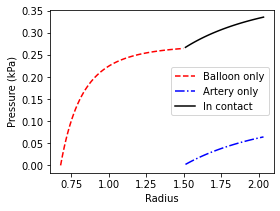

In [5]:
p_all = np.array(p_all)
p_art = np.array(p_art)
r_all = np.array(r_all)
contact = np.array(contact)
fig,ax = plt.subplots(1,1,figsize=(4,3))

ax.plot(r_all[~contact],p_all[~contact],'--r',label='Balloon only')
ax.plot(r_all[contact],p_art,'-.b',label='Artery only')
ax.plot(r_all[contact],p_all[contact],'-k',label='In contact')
ax.set_xlabel('Radius')
ax.set_ylabel('Pressure (kPa)')
plt.legend()
plt.show()